# Project: Medical Appointment No Shows Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

A person makes a doctor appointment, receives all the instructions and no-show. Who to blame?
<ul>
<li>Are older people more keen to come as scheduled?</li>
<li>Who are more probably absent, males or females?</li>
<li>Do chronic diseases affect the no show probability?</li>
<li>Are alcoholic people more probably absent? </li>
<li>Do SMS increase the probability of attendance? By how much?</li>

For simplicity, we will analyse each parameter separately. We may need more analysis using ML algorithms to have a more accurate prediction of the patients attendance, but this is out of scope of this project.
</ul>


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline


<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [2]:
#Loading data
df = pd.read_csv('noshowappointments.csv')
df.head()


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


**The patient ID appears in scientific notation, but this column will not be analysed here. <br> 
Although the interval between the scheduling date and appointment date can affect the probability of attendance, but will not be considered in this analysis. <br>
Also neighbourhood will be removed from the data frame as it will not be used**

In [3]:
#Explore the columns and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


**Apparently, there are 14 columns and 110527 rows without any null values.**

In [4]:
#View a summary of data
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.920000e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172615e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173180e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439170e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999820e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


**Age column has some unlogic values that will need more exploration. Even if we accepted the ages more than 100 years, negative values are absolutely wrong.**

In [5]:
#find the row(s) with age less than 0
df[df.Age <0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659430e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [6]:
#Check duplicates
df.duplicated().sum()

0

In [7]:
#check values
df.nunique()

PatientId          61744
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

**As per the dataset documentation in kaggle, Handcap should have the values of either True or False, This needs more investigation.**

In [8]:
#check the values in Handcap column
df.Handcap.value_counts()

0    108286
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64

**We will not include the handcap column in our analysis.**

### Data Cleaning:
<li> Drop unlogic data.</li>
<li> Drop un needed columns</li>
<li> Adjust Column Labels </li>
<li> Perform feature engineering</li>

In [9]:
#Drop unlogic row with age less than 0
df.drop(99832, inplace =True)

In [10]:
#Check again 
df[df.Age <0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


In [11]:
#Drop un needed columns
df.drop(['PatientId', 'AppointmentID', 'ScheduledDay', 'AppointmentDay', 'Neighbourhood', 'Handcap'], axis=1, inplace = True)

In [12]:
#Check the new structure
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 8 columns):
Gender          110526 non-null object
Age             110526 non-null int64
Scholarship     110526 non-null int64
Hipertension    110526 non-null int64
Diabetes        110526 non-null int64
Alcoholism      110526 non-null int64
SMS_received    110526 non-null int64
No-show         110526 non-null object
dtypes: int64(6), object(2)
memory usage: 7.6+ MB


In [13]:
# Adjust column labels
df.rename(columns={'SMS_received': 'SMSReceived', 'No-show': 'NoShow'}, inplace='True')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 8 columns):
Gender          110526 non-null object
Age             110526 non-null int64
Scholarship     110526 non-null int64
Hipertension    110526 non-null int64
Diabetes        110526 non-null int64
Alcoholism      110526 non-null int64
SMSReceived     110526 non-null int64
NoShow          110526 non-null object
dtypes: int64(6), object(2)
memory usage: 7.6+ MB


In [14]:
#Feature engineering: create a column with value 1 if the patient has a chronic disease, otherwise set to 0
df['Chronic'] = df.Diabetes + df.Hipertension
df.loc[df['Chronic'] >1, ['Chronic']]= 1

In [15]:
df.head()

,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,SMSReceived,NoShow,Chronic
0,F,62,0,1,0,0,0,No,1
1,M,56,0,0,0,0,0,No,0
2,F,62,0,0,0,0,0,No,0
3,F,8,0,0,0,0,0,No,0
4,F,56,0,1,1,0,0,No,1


In [16]:
#Can drop the Hipertension and Diabetes columns, as I merged them to simplify analysis
df.drop(['Diabetes', 'Hipertension' ], axis = 1 , inplace = True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 7 columns):
Gender         110526 non-null object
Age            110526 non-null int64
Scholarship    110526 non-null int64
Alcoholism     110526 non-null int64
SMSReceived    110526 non-null int64
NoShow         110526 non-null object
Chronic        110526 non-null int64
dtypes: int64(5), object(2)
memory usage: 6.7+ MB


In [18]:
#To simplify analysis, I would change the NoShow value to be 1 for absence and 0 for presence
df.loc[df.NoShow== 'Yes', 'NoShow']=1

In [19]:
df.loc[df.NoShow== 'No', 'NoShow']=0

In [20]:
#Now change the type to int
df.NoShow = df.NoShow.astype(int)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 7 columns):
Gender         110526 non-null object
Age            110526 non-null int64
Scholarship    110526 non-null int64
Alcoholism     110526 non-null int64
SMSReceived    110526 non-null int64
NoShow         110526 non-null int64
Chronic        110526 non-null int64
dtypes: int64(6), object(1)
memory usage: 6.7+ MB


<a id='eda'></a>
## Exploratory Data Analysis


In [22]:
# First I'll separate people with no show from those who attended
show_df = df[df.NoShow == 0]
noshow_df = df[df.NoShow == 1]

In [23]:
show_df.head()

,Gender,Age,Scholarship,Alcoholism,SMSReceived,NoShow,Chronic
0,F,62,0,0,0,0,1
1,M,56,0,0,0,0,0
2,F,62,0,0,0,0,0
3,F,8,0,0,0,0,0
4,F,56,0,0,0,0,1


In [24]:
noshow_df.head()

,Gender,Age,Scholarship,Alcoholism,SMSReceived,NoShow,Chronic
6,F,23,0,0,0,1,0
7,F,39,0,0,0,1,0
11,M,29,0,0,1,1,0
17,F,40,1,0,0,1,0
20,F,30,0,0,0,1,0


In [53]:
show_df.shape, noshow_df.shape

((88207, 7), (22319, 7))

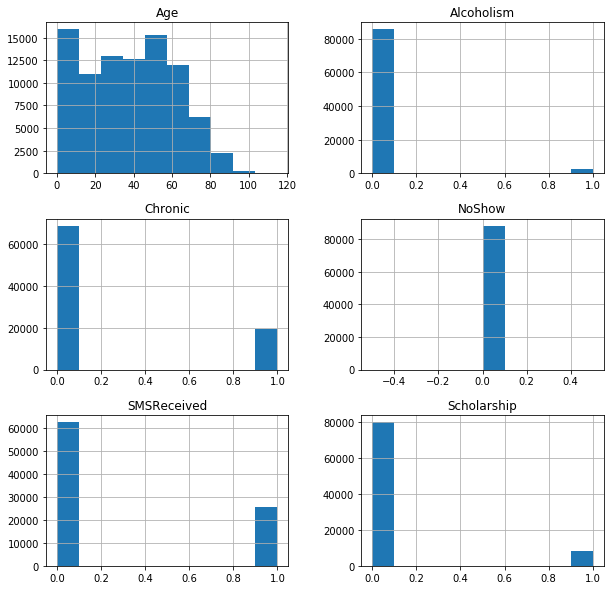

In [25]:
#Explore each data set
show_df.hist(figsize = (10,10));

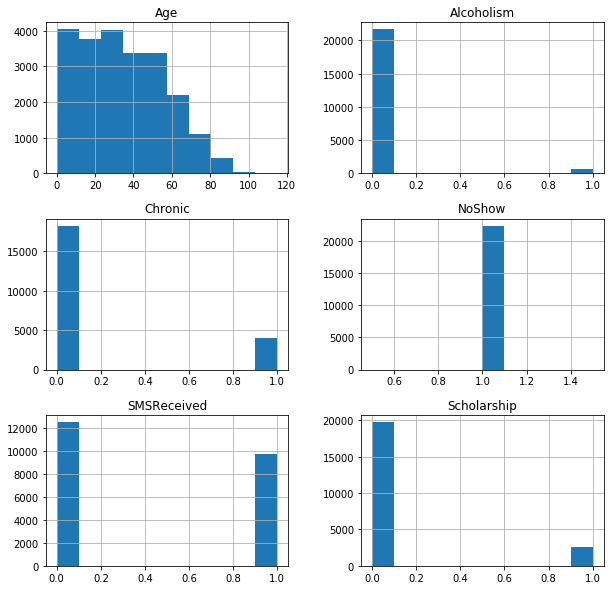

In [26]:
noshow_df.hist(figsize = (10,10));

### Are older people more keen to come as scheduled?

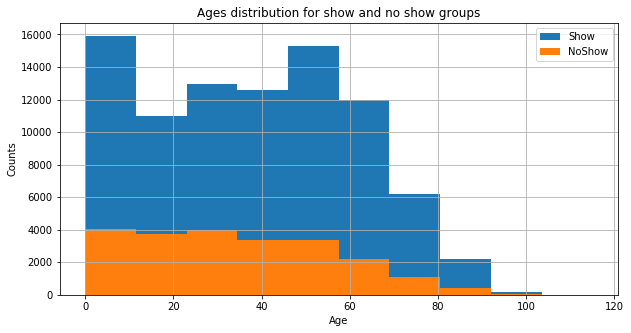

In [40]:
# Lets visualize age ranges for both show and no show data sets
show_df.Age.hist(label = 'Show', figsize=(10,5))
noshow_df.Age.hist(Label = 'NoShow');
plt.legend();
plt.xlabel('Age')
plt.ylabel('Counts')
plt.title('Ages distribution for show and no show groups');


Age
(0, 10]       0.207035
(10, 20]      0.252538
(20, 30]      0.246245
(30, 40]      0.214722
(40, 50]      0.199029
(50, 60]      0.173744
(60, 70]      0.147288
(70, 80]      0.155392
(80, 90]      0.159984
(90, 100]     0.196013
(100, 110]    0.000000
Name: NoShow, dtype: float64

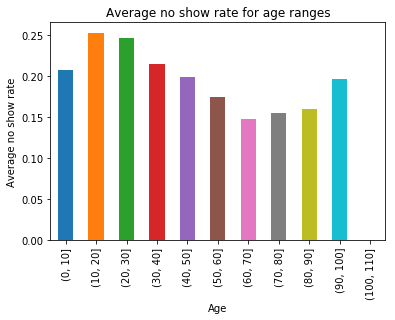

In [42]:
bins = range(0, 120, 10)

df.groupby(pd.cut(df['Age'], bins=bins)).NoShow.mean().plot(kind='bar')
plt.ylabel('Average no show rate')
plt.title('Average no show rate for age ranges');
df.groupby(pd.cut(df['Age'], bins=bins)).NoShow.mean()


#### Apparently there is no relation between age and attendance!

## Who are more probably absent, males or females?

In [29]:
show_df.Gender.value_counts()

F    57245
M    30962
Name: Gender, dtype: int64

In [30]:
noshow_df.Gender.value_counts()

F    14594
M     7725
Name: Gender, dtype: int64

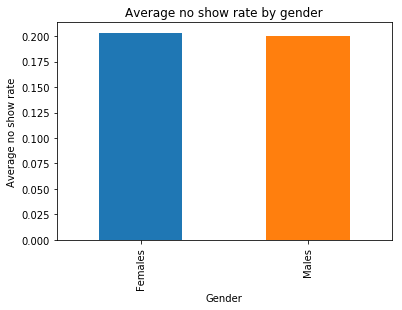

In [45]:
df.groupby('Gender').NoShow.mean().plot(kind = 'bar')
plt.xticks((1, 0), ('Males','Females'))
plt.ylabel('Average no show rate')
plt.title('Average no show rate by gender');

#### Again, Gender doesn't seem to affect the attendance!

## Do chronic diseases affect the no show probability?

Chronic
0    0.209218
1    0.174607
Name: NoShow, dtype: float64

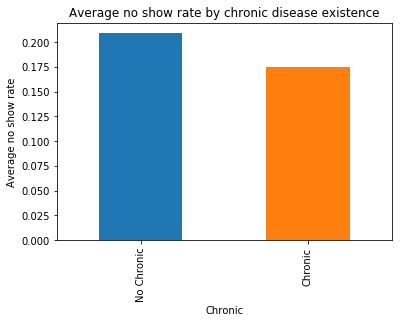

In [47]:
# Lets see the average no show for those with and without chronic diseases
df.groupby('Chronic').NoShow.mean().plot(kind = 'bar')
plt.xticks((0,1), ('No Chronic', 'Chronic'))
plt.ylabel('Average no show rate')
plt.title('Average no show rate by chronic disease existence');
df.groupby('Chronic').NoShow.mean()

#### It seems that people with diabetes or hypertension are more likely to attend than those without chronic diseases.

## Are alcoholic people more probably absent?

Alcoholism
0    0.201948
1    0.201488
Name: NoShow, dtype: float64

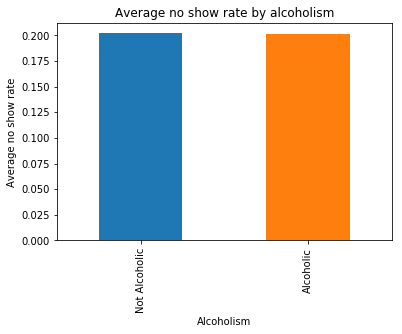

In [49]:
df.groupby('Alcoholism').NoShow.mean().plot(kind = 'bar')
plt.xticks((0,1),('Not Alcoholic', 'Alcoholic'))
plt.ylabel('Average no show rate')
plt.title('Average no show rate by alcoholism');
df.groupby('Alcoholism').NoShow.mean()

#### Alcoholism does not affect the attendance

## Do SMS increase the probability of attendance? By how much?

SMSReceived
0    0.167035
1    0.275745
Name: NoShow, dtype: float64

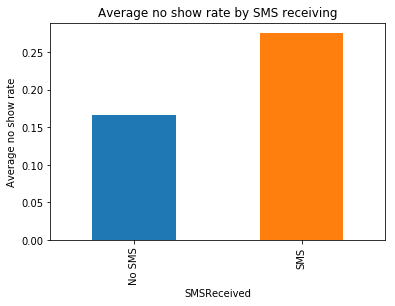

In [51]:
df.groupby('SMSReceived').NoShow.mean().plot(kind = 'bar')
plt.xticks((0,1), ('No SMS', 'SMS'))
plt.ylabel('Average no show rate')
plt.title('Average no show rate by SMS receiving');
df.groupby('SMSReceived').NoShow.mean()

In [35]:
df.groupby('SMSReceived').NoShow.mean()

SMSReceived
0    0.167035
1    0.275745
Name: NoShow, dtype: float64

#### Surprisingly the patients who received SMS have a much larger no show percentage!!!

In [36]:
df.SMSReceived.value_counts()

0    75044
1    35482
Name: SMSReceived, dtype: int64

In [37]:
df.groupby('SMSReceived').mean()

,Age,Scholarship,Alcoholism,NoShow,Chronic
SMSReceived,,,,,
0,36.888465,0.098022,0.033487,0.167035,0.212715
1,37.513810,0.098782,0.023871,0.275745,0.205597


<a id='conclusions'></a>
## Conclusions

I performed this analysis to find out what parameters of patients increase the probability of no-show. <br>
The sample includes 110527 appointments, I deleted one row as it contained negative age. 88207 attended as per schedule while 22319 did not, with a noshow percentage of about 20%. <br>
There are no missing values in the data set.<br>
I selected some parameters that I thought would be important. Those were:
<ul>
    <li> <b>Age</b>: Age doesn't seem to affect the attendance probability </li>
    <li> <b>Gender</b>: Gender also doesn't seem to affect the probability of attendance </li>
    <li> <b>Chronic diseases</b>: I summed the diabetes and hypertension as having chronic disease. Those who have chronic diseases are more likely to attend. </li>
    <li> <b>Alcoholism</b>: The average attendance for both alcoholic and non alcoholic are nearly the same.</li>
    <li> <b>SMSReceived</b>: This was the most surprising result! Patients who received SMS have higher no show rates than those who don't!!! </li>
    More advanced analytical techniques and algorithms could improve the results and show the correlation among different variables. 
    </ul>



In [54]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0